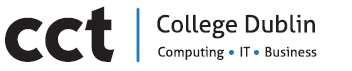


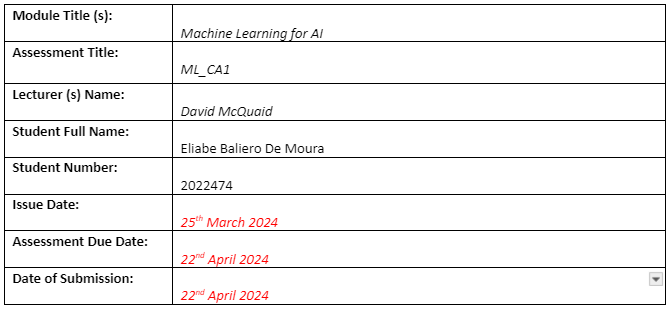

# Introduction 1

# Data analize Checking file properties 2

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv("log2.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [58]:
df.shape

(65532, 12)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [60]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


# Cleaning Dataset 3

Cheacking if there is any duplicated row

In [61]:
duplicates = df.duplicated()
print("\nDuplicate Rows:")
print(df[duplicates])


Duplicate Rows:
       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
268          21268             62609                0                     0   
351          48706             23393                0                     0   
593          65003             57470                0                     0   
632            443             49988                0                     0   
661          10669             49756                0                     0   
...            ...               ...              ...                   ...   
65517        54874               445                0                     0   
65519        49784               445                0                     0   
65521        42995             26467                0                     0   
65522        53314             64097                0                     0   
65531        54867               445                0                     0   

       Bytes  Bytes Sent  Bytes Re

Now we can drop the rows that are duplicated, and as we can see the shap of our data went from (65532, 12) to (57170, 12)

In [62]:
df = df.drop_duplicates()
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
65526,51710,43069,65147,43069,70,70,0,2,8,2,0,allow
65527,63691,80,13237,80,314,192,122,6,15,4,2,allow
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,allow
65529,54871,445,0,0,70,70,0,1,0,1,0,drop


Convert all string values to lower case

In [63]:
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

Remove extra white spaces from all string columns

In [64]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

Checking any null/na in my data

In [65]:
df.isnull().sum()
#df.fillna('')

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

Indentify Outiliers

In [73]:
# Define the columns you want to check for outliers
columns_to_check = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

# Function to identify outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers for each specified column
outliers = df[columns_to_check].apply(detect_outliers)

# Print the number of outliers found in each column
print(outliers.sum())

# Display the rows containing outliers
print(df[outliers.any(axis=1)])




Bytes                 11945
Bytes Sent            11002
Bytes Received        11164
Packets                7123
Elapsed Time (sec)     7797
pkts_sent              7653
pkts_received          7639
dtype: int64
       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
5            51465               443            39975                   443   
...            ...               ...              ...                   ...   
65505        35608               443            62915                   443   
65507         5938             22455                0                     0   
65508        36226             60038                0                     0   
6

In [77]:
df_no_outliers = df[~outliers.any(axis=1)]
df_no_outliers

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,ALLOW
6,60513,47094,45469,47094,320,140,180,6,7,3,3,ALLOW
8,52244,58774,2211,58774,70,70,0,1,5,1,0,ALLOW
10,43676,80,45378,80,696,378,318,12,35,7,5,ALLOW
13,55597,53,45448,53,168,86,82,2,30,1,1,ALLOW
...,...,...,...,...,...,...,...,...,...,...,...,...
65525,65323,53,33275,53,356,118,238,2,30,1,1,ALLOW
65526,51710,43069,65147,43069,70,70,0,2,8,2,0,ALLOW
65527,63691,80,13237,80,314,192,122,6,15,4,2,ALLOW
65529,54871,445,0,0,70,70,0,1,0,1,0,DROP


# Machine Learning 4

# Labeled and Unlabeled Data 5

# Model 
RandomForestClassifier x  Logistic Regression

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Encode categorical feature 
df_no_outliers['Action'] = df_no_outliers['Action'].astype('category').cat.codes

# Prepare data
X = df_no_outliers.drop(columns=['Action'])  # Features
y = df_no_outliers['Action']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("RandomForestClassifier Accuracy:", rf_accuracy)
print("RandomForestClassifier Classification Report:")
print(classification_report(y_test, rf_y_pred))



# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate Multi-layer Perceptron (Neural Network)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_y_pred = nn_model.predict(X_test_scaled)
nn_accuracy = accuracy_score(y_test, nn_y_pred)
print("\nMulti-layer Perceptron (Neural Network) Accuracy:", nn_accuracy)
print("Multi-layer Perceptron (Neural Network) Classification Report:")
print(classification_report(y_test, nn_y_pred))





RandomForestClassifier Accuracy: 0.997311199438859
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4578
           1       0.99      1.00      0.99      1607
           2       1.00      1.00      1.00      2359
           3       1.00      0.40      0.57        10

    accuracy                           1.00      8554
   macro avg       1.00      0.85      0.89      8554
weighted avg       1.00      1.00      1.00      8554


Multi-layer Perceptron (Neural Network) Accuracy: 0.9969604863221885
Multi-layer Perceptron (Neural Network) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4578
           1       0.99      0.99      0.99      1607
           2       0.99      1.00      1.00      2359
           3       1.00      0.10      0.18        10

    accuracy                           1.00      8554
   macro 

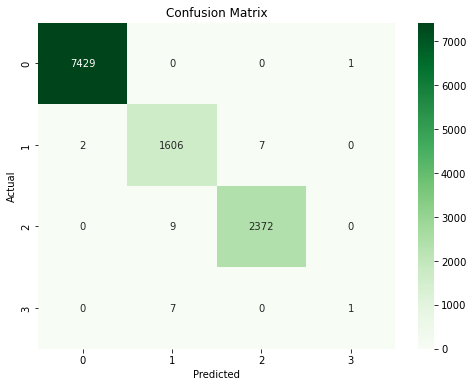

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming df_no_outliers is already prepared

# Encode categorical feature 
df_no_outliers['Action'] = df_no_outliers['Action'].astype('category').cat.codes

# Prepare data
X = df_no_outliers.drop(columns=['Action'])  # Features
y = df_no_outliers['Action']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate Multi-layer Perceptron (Neural Network)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_y_pred = nn_model.predict(X_test_scaled)
nn_accuracy = accuracy_score(y_test, nn_y_pred)
print("\nMulti-layer Perceptron (Neural Network) Accuracy:", nn_accuracy)
print("Multi-layer Perceptron (Neural Network) Classification Report:")
print(classification_report(y_test, nn_y_pred))



Multi-layer Perceptron (Neural Network) Accuracy: 0.9969604863221885
Multi-layer Perceptron (Neural Network) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4578
           1       0.99      0.99      0.99      1607
           2       0.99      1.00      1.00      2359
           3       1.00      0.10      0.18        10

    accuracy                           1.00      8554
   macro avg       1.00      0.77      0.79      8554
weighted avg       1.00      1.00      1.00      8554

